# Part II - Effects of gender, and user type, on trip duration 
## by Joseph Mburu


## Investigation Overview

> For the presentation, I primarily focused on the effects of gender and user type on trip duration. These variables are selected for presentations because they showed clear relationship without ambiguity. I will start by showing the distribution of the trip duration variable after log transformation. I will then introduce the categorical variables, one by one to get insights into the relationship between each of the categorical variable and trip duration. The relationship will be polished using box plots and clustered bar chart.  


## Dataset Overview

> The data consisted of trip duration and attributes of approximately 183,412 bike riders. The attributes included 16 features as well as other additional variables such as age, start day and end day. After removing observations with missing values, the data contained 174,952 bike riders. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
#make a copy of the data to avoid altering the original dataset
bike = bike_data.copy()

In [3]:
#drop rows with missing values 
bike.dropna(inplace=True, axis=0)

#convert `bike_id`, `start_station_id`,  `end_station_id` into string data types
bike['start_station_id'] =bike['start_station_id'].astype(str)
bike['end_station_id'] =bike['end_station_id'].astype(str)
bike['bike_id'] =bike['bike_id'].astype(str)
#convert member birth year from float to int
bike['member_birth_year']=bike['member_birth_year'].astype(int)
#convert duration_sec to float
bike['duration_sec']=bike['duration_sec'].astype(float)


#convert start_time and end_time to data time format
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

##convert start_time to hours, days, month and year
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_month'] = bike['start_time'].dt.month_name()
#bike['start_year'] = bike['start_time'].dt.year
##convert end_time to hours, days, month and year

bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
#bike['end_year'] = bike['end_time'].dt.year

#calculate the age of the participants when this trip started. 
bike['age']=(2019-bike.member_birth_year)
#it is most likely that this value should be 1978 instead of 1878. Thus, we replace the value with 1978
for i in bike.member_birth_year.values:
    if i ==1878:
        bike.replace(i, 1978, inplace=True)

In [4]:
## convert day, and months into ordered categorical types
ordered_dict ={'start_day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
               'end_day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
                'start_month':['January', 'February', 'March'], 
                'end_month':['January', 'February', 'March']}
for var in ordered_dict:
    ordered_var=pd.api.types.CategoricalDtype(ordered = True, categories =ordered_dict[var])
    bike[var]=bike[var].astype(ordered_var)

## Distribution of Trip duration 

> The trip duration variables assumes a wide range of values ranging from 0 to 80,000 seconds. However, when plotted on a logarithmic scale, the distribution is unimodal with peaks between 200 and 1000 seconds.


In [5]:
#create a function that gives the xlabel, ylabel and title to any graph
def x_y_t(Xlab, Ylab, title):
    plt.title(title)
    plt.xlabel(Xlab)
    plt.ylabel(Ylab)

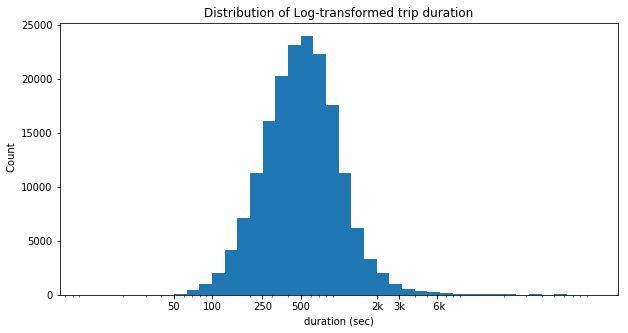

In [6]:

bins= 10**np.arange(1, 5+0.1, 0.1)
#increase figure size
plt.figure(figsize=(10, 5))
plt.hist(data=bike, x = 'duration_sec', bins=bins)
plt.xscale('log')
#add title, x label and y label
x_y_t('duration (sec)',' Count', 'Distribution of Log-transformed trip duration')
plt.xticks([50, 100, 250, 500, 2000, 3000, 6000],[50, 100,250, 500, '2k',  '3k',' 6k'])
plt.show()

## Gender vs. trip duration
> To investigate the relationship between gender and trip duration, a box plot was plotted. The box plots showed that there were many outliers in the trip duration. Thus, to get a clear visual of the relationship, we limited the number of observations to 3000 seconds. The results showed that male bike riders completed the trip faster than female bike riders.


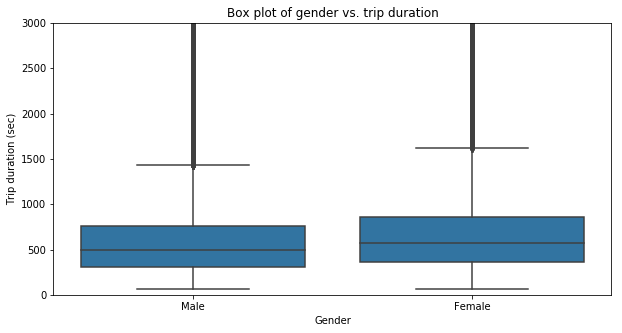

In [7]:
#increase figure size
plt.figure(figsize=(10,5))
#filter bike data to only records where gender is male or female
gen_bike =bike[bike['member_gender'].isin(['Male', 'Female'])]
#set the base color
base_col=sns.color_palette()[0]
#create a box plot
sns.boxplot(gen_bike['member_gender'], gen_bike['duration_sec'], color=base_col)
#set the limit to 3000 sec to reduce the effects of outliers
plt.ylim(0, 3000)
#add title, x label and y label
x_y_t('Gender','Trip duration (sec)', 'Box plot of gender vs. trip duration')

plt.show()

## User type vs. trip duration 

> To gain more insights into the association between user type and trip duration, a box plot was plotted. There were many outliers on the upper part of the distribution and this was countered by limiting the duration to 3000 seconds when plotting. The box plot showed that subscribers completed the trip faster than customers. 



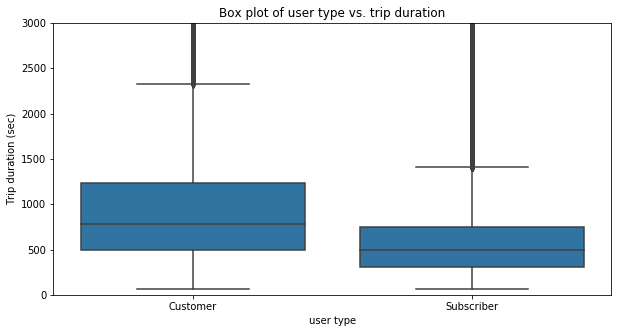

In [8]:
#increase figure size
plt.figure(figsize=(10,5))
#set the base color
base_col=sns.color_palette()[0]
#create a box plot
sns.boxplot(bike['user_type'], bike['duration_sec'], color=base_col)
#add title, x label and y label
x_y_t('user type','Trip duration (sec)', 'Box plot of user type vs. trip duration')

#set y limit to 3000 sec to eliminate the effects of outliers 
plt.ylim(0, 3000)
plt.show()

## User type vs. Gender
>To investigate the association between gender and user type, a clustered bar chart was plotted. The results showed that the number of males who were either customer or subscribers were more than females who were either customers or subscribers.

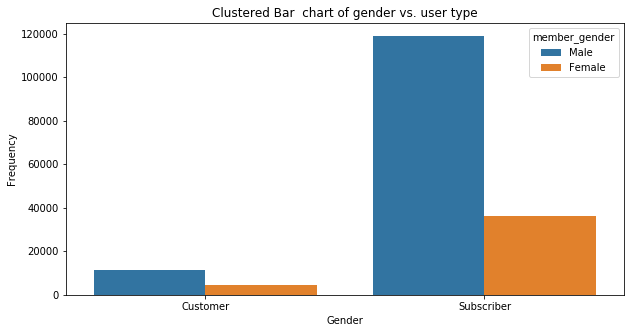

In [9]:
#increase figure size
plt.figure(figsize=(10,5))
#plot a clustered bar chart of user type by gender
sns.countplot(data=gen_bike, x ='user_type', hue='member_gender')
#add title, x label and y label
x_y_t('Gender','Frequency', 'Clustered Bar  chart of gender vs. user type')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 340578 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
